In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498212 sha256=68c28f1c49c3e6c9e481a19d0567dc90aebe68551a28215a14f3009d001b867c
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [ ]:
from sklearn.datasets import fetch_20newsgroups
import random

train_data = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'))
train_texts = train_data.data
train_labels = train_data.target

test_data = fetch_20newsgroups(subset='test', remove=('headers','footers','quotes'))
test_texts = test_data.data
test_labels = test_data.target

len(train_texts), len(test_texts)

(11314, 7532)

In [ ]:
train_formatted = [
    f"__label__{label} {text.replace('\n', ' ')}"
    for text, label in zip(train_texts, train_labels)
]

test_formatted = [
    f"__label__{label} {text.replace('\n', ' ')}"
    for text, label in zip(test_texts, test_labels)
]

random.shuffle(train_formatted)
random.shuffle(test_formatted)

with open("train.txt", "w") as f:
    f.write("\n".join(train_formatted))

with open("test.txt", "w") as f:
    f.write("\n".join(test_formatted))

print("Files created!")

Files created!


In [ ]:
import fasttext
import time

start = time.time()
baseline_model = fasttext.train_supervised(
    input="train.txt",
    epoch=10,
    lr=1.0,
    wordNgrams=2
)
baseline_time = time.time() - start

baseline_results = baseline_model.test("test.txt")
baseline_results, baseline_time

((7532, 0.4555231014338821, 0.4555231014338821), 23.81091547012329)

In [ ]:
start = time.time()
unigram_model = fasttext.train_supervised(
    input="train.txt",
    epoch=10,
    lr=1.0,
    wordNgrams=1
)
unigram_time = time.time() - start

unigram_results = unigram_model.test("test.txt")
unigram_results, unigram_time

((7532, 0.5370419543281997, 0.5370419543281997), 11.081672668457031)

In [ ]:
start = time.time()
light_model = fasttext.train_supervised(
    input="train.txt",
    epoch=5,
    lr=0.5,
    wordNgrams=2
)
light_time = time.time() - start

light_results = light_model.test("test.txt")
light_results, light_time

((7532, 0.2575677110993096, 0.2575677110993096), 17.538248777389526)

In [ ]:
start = time.time()
no_subword_model = fasttext.train_supervised(
    input="train.txt",
    epoch=10,
    lr=1.0,
    wordNgrams=2,
    minn=0,
    maxn=0
)
no_subword_time = time.time() - start

no_subword_results = no_subword_model.test("test.txt")
no_subword_results, no_subword_time

((7532, 0.4555231014338821, 0.4555231014338821), 30.71583604812622)

In [ ]:
import matplotlib.pyplot as plt

models = ["Baseline", "Unigram", "Fewer Epochs + LR", "No Subwords"]

accuracies = [
    0.4555231014338821,
    0.5370419543281997,
    0.2575677110993096,
    0.4555231014338821
]

times = [
    23.81091547012329,
    11.081672668457031,
    17.538248777389526,
    30.71583604812622
]

/tmp/ipython-input-62432620.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


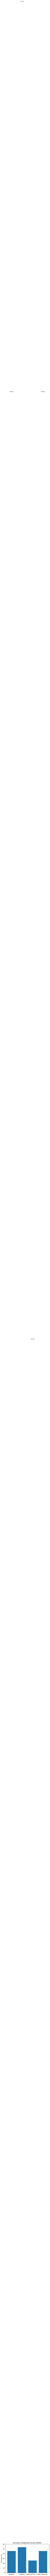

In [ ]:
plt.figure(figsize=(6,4))
bars = plt.bar(models, [a*100 for a in accuracies])
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison Across Models")

for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height()*100 + 1,
        f"{acc*100:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.ylim(0, 60)
plt.tight_layout()
plt.savefig("accuracy_comparison.png")
plt.show()

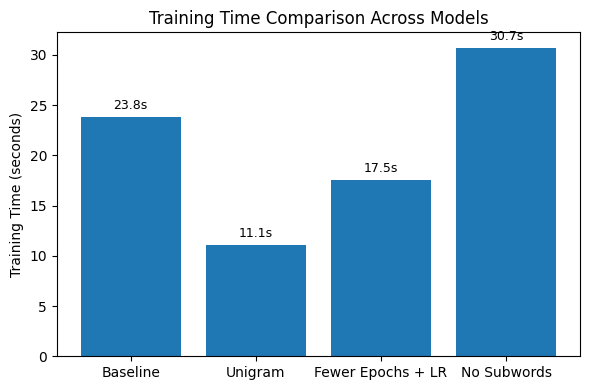

In [ ]:
plt.figure(figsize=(6,4))
bars = plt.bar(models, times)
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison Across Models")

for bar, t in zip(bars, times):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        t + 0.5,
        f"{t:.1f}s",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.savefig("time_comparison.png")
plt.show()
